<a href="https://colab.research.google.com/github/miha-tran/Stock_models/blob/main/Yahoo_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
stock = yf.Ticker("AAPL")
data = stock.history(period="1y")


In [2]:
import pandas as pd
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.dropna(inplace=True)


In [3]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()


In [4]:
data['Daily_Return'] = data['Close'].pct_change()


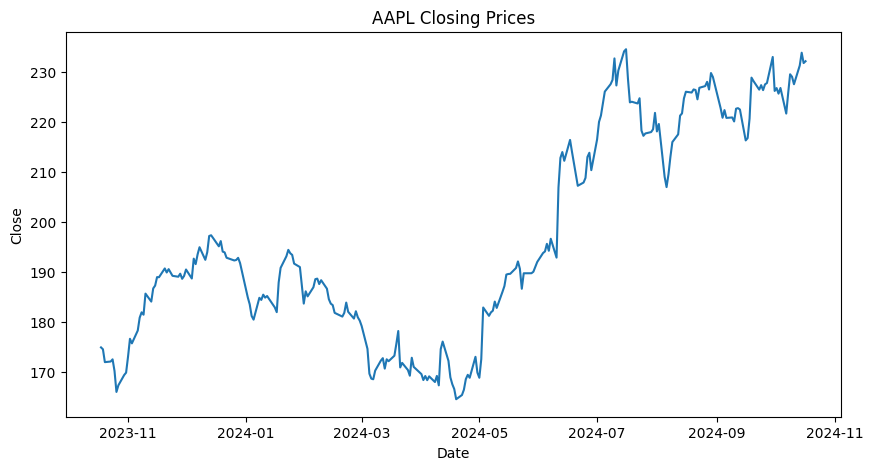

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.lineplot(x=data.index, y=data['Close'])
plt.title('AAPL Closing Prices')
plt.show()


In [6]:
!pip install pandas_ta



In [7]:
import pandas_ta as ta


In [8]:
# Applying technical analysis indicators
bbands = ta.bbands(data['Close'], length=20)
data = data.join(bbands)

data['RSI'] = ta.rsi(data['Close'], length=14)
macd = ta.macd(data['Close'], fast=12, slow=26)
data = data.join(macd)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [14]:
X = data[['SMA_20', 'RSI']]
y = data['Close']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

In [18]:
from sklearn.impute import SimpleImputer

In [28]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [29]:
import pandas as pd

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X.columns)


In [24]:
model.fit(X_train_imputed, y_train)
predictions = model.predict(X_test_imputed)

In [25]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [33]:
data.to_csv('stock_analysis.csv')


In [34]:
predictions = model.predict(X_test)


In [35]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})


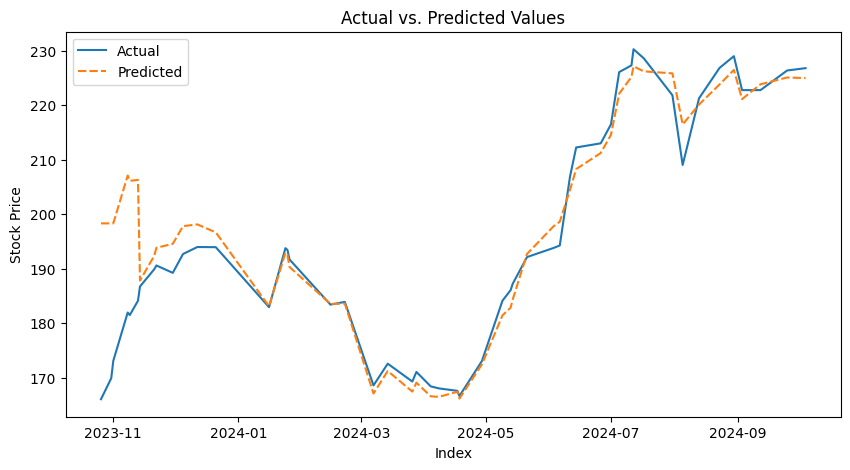

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=results)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.show()


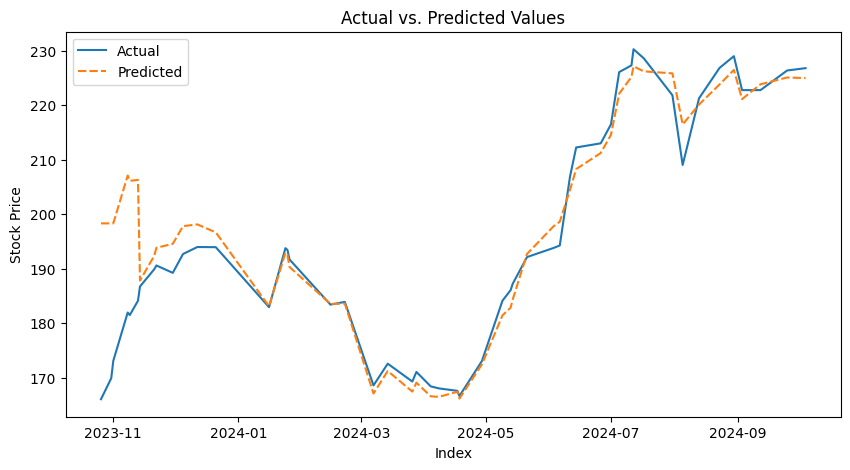

In [37]:
# Extract predictions
predictions = model.predict(X_test)

# Create a DataFrame for actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=results)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.show()


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


MAE: 5.1059272069498665
MSE: 89.365838896057
RMSE: 9.453350670320921
R-squared: 0.793720229196814


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
